# ETL

### En esta libreta se hace el ETL y posteriormente el EDA de 6 conjuntos de datos con información general del país, en la segunda libreta se hará el mismo proceso para los conjuntos de datos desglosados por provincia.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Configurar para que solo muestre 2 decimales

In [32]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [33]:
# read in the 6 dataframes
df1 = pd.read_csv('csv/bajada.csv')
df2 = pd.read_csv('csv/banda_dialup.csv')
df3 = pd.read_csv('csv/ingresos.csv')
df4 = pd.read_csv('csv/penetracion.csv')
df5 = pd.read_csv('csv/rango_velocidad.csv')
df6 = pd.read_csv('csv/tecnologia.csv')

Eliminar algunas columnas innecesarias que impiden unir correctamente los 6 dataframes

In [34]:
df5 = df5.drop(['OTROS', 'Total', 'Unnamed: 11'], axis=1)

Ir juntando las tablas una a una, según columnas que comparten.

In [35]:
df = pd.merge(df1, df2, on=['Año', 'Trimestre', 'Periodo'], how='inner')

In [36]:
df = pd.merge(df, df3, on=['Año', 'Trimestre', 'Periodo'], how='inner')

In [37]:
df = pd.merge(df, df4, on=['Año', 'Trimestre', 'Periodo'], how='inner')

In [38]:
df = pd.merge(df, df5, on=['Año', 'Trimestre'], how='inner')

In [39]:
df = pd.merge(df, df6, on=['Año', 'Trimestre', 'Total', 'Periodo'], how='inner')

Visualizar lista de columnas y posteriormente organizarlas de forma más coherente

In [40]:
df.columns.tolist()

['Año',
 'Trimestre',
 'Mbps (Media de bajada)',
 'Periodo',
 'Banda ancha fija',
 'Dial up',
 'Total',
 'Ingresos (miles de pesos)',
 'Accesos por cada 100 hogares',
 'Accesos por cada 100 hab',
 'Hasta 512 kbps',
 'Entre 512 Kbps y 1 Mbps',
 'Entre 1 Mbps y 6 Mbps',
 'Entre 6 Mbps y 10 Mbps',
 'Entre 10 Mbps y 20 Mbps',
 'Entre 20 Mbps y 30 Mbps',
 'Más de 30 Mbps',
 'ADSL',
 'Cablemodem',
 'Fibra óptica',
 'Wireless',
 'Otros']

Organizar el orden de las columnas del dataframe

In [41]:
df = df[['Año','Trimestre','Periodo','Total','Ingresos (miles de pesos)','Accesos por cada 100 hogares',
         'Accesos por cada 100 hab','Banda ancha fija','Dial up','ADSL','Cablemodem','Fibra óptica','Wireless',
         'Mbps (Media de bajada)','Hasta 512 kbps','Entre 512 Kbps y 1 Mbps','Entre 1 Mbps y 6 Mbps',
         'Entre 6 Mbps y 10 Mbps','Entre 10 Mbps y 20 Mbps','Entre 20 Mbps y 30 Mbps','Más de 30 Mbps','Otros']]

Eliminar columna innecesaria

In [42]:
df = df.drop('Otros', axis=1)

Revisar tipos de datos

In [43]:
df.dtypes

Año                               int64
Trimestre                         int64
Periodo                          object
Total                            object
Ingresos (miles de pesos)        object
Accesos por cada 100 hogares     object
Accesos por cada 100 hab         object
Banda ancha fija                 object
Dial up                         float64
ADSL                             object
Cablemodem                       object
Fibra óptica                     object
Wireless                        float64
Mbps (Media de bajada)           object
Hasta 512 kbps                  float64
Entre 512 Kbps y 1 Mbps         float64
Entre 1 Mbps y 6 Mbps            object
Entre 6 Mbps y 10 Mbps           object
Entre 10 Mbps y 20 Mbps          object
Entre 20 Mbps y 30 Mbps          object
Más de 30 Mbps                   object
dtype: object

Transformar el tipo de datos, eliminar los puntos ('.') de los enteros y sustituir las comas por puntos en los flotantes.

In [44]:
df['Total'] = df['Total'].astype(str).str.replace('.', '').astype(int)
df['Ingresos (miles de pesos)'] = df['Ingresos (miles de pesos)'].astype(str).str.replace('.', '').astype(int)
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].str.replace(',', '.').astype(float)
df['Accesos por cada 100 hab'] = df['Accesos por cada 100 hab'].str.replace(',', '.').astype(float)
df['Banda ancha fija'] = df['Banda ancha fija'].astype(str).str.replace('.', '').astype(int)
df['Dial up'] = df['Dial up'].astype(str).str.replace('.', '').astype(int)
df['ADSL'] = df['ADSL'].astype(str).str.replace('.', '').astype(int)
df['Cablemodem'] = df['Cablemodem'].astype(str).str.replace('.', '').astype(int)
df['Fibra óptica'] = df['Fibra óptica'].astype(str).str.replace('.', '').astype(int)
df['Wireless'] = df['Wireless'].astype(str).str.replace('.', '').astype(int)
df['Mbps (Media de bajada)'] = df['Mbps (Media de bajada)'].str.replace(',', '.').astype(float)
df['Hasta 512 kbps'] = df['Hasta 512 kbps'].astype(str).str.replace('.', '').astype(int)
df['Entre 512 Kbps y 1 Mbps'] = df['Entre 512 Kbps y 1 Mbps'].astype(str).str.replace('.', '').astype(int)
df['Entre 1 Mbps y 6 Mbps'] = df['Entre 1 Mbps y 6 Mbps'].astype(str).str.replace('.', '').astype(int)
df['Entre 6 Mbps y 10 Mbps'] = df['Entre 6 Mbps y 10 Mbps'].astype(str).str.replace('.', '').astype(int)
df['Entre 10 Mbps y 20 Mbps'] = df['Entre 10 Mbps y 20 Mbps'].astype(str).str.replace('.', '').astype(int)
df['Entre 20 Mbps y 30 Mbps'] = df['Entre 20 Mbps y 30 Mbps'].astype(str).str.replace('.', '').astype(int)
df['Más de 30 Mbps'] = df['Más de 30 Mbps'].astype(str).str.replace('.', '').astype(int)

Revisamos que los tipos de datos sean los deseados

In [45]:
df.dtypes

Año                               int64
Trimestre                         int64
Periodo                          object
Total                             int32
Ingresos (miles de pesos)         int32
Accesos por cada 100 hogares    float64
Accesos por cada 100 hab        float64
Banda ancha fija                  int32
Dial up                           int32
ADSL                              int32
Cablemodem                        int32
Fibra óptica                      int32
Wireless                          int32
Mbps (Media de bajada)          float64
Hasta 512 kbps                    int32
Entre 512 Kbps y 1 Mbps           int32
Entre 1 Mbps y 6 Mbps             int32
Entre 6 Mbps y 10 Mbps            int32
Entre 10 Mbps y 20 Mbps           int32
Entre 20 Mbps y 30 Mbps           int32
Más de 30 Mbps                    int32
dtype: object

Verificamos posibles datos faltantes

In [46]:
df.isna().sum()

Año                             0
Trimestre                       0
Periodo                         0
Total                           0
Ingresos (miles de pesos)       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Banda ancha fija                0
Dial up                         0
ADSL                            0
Cablemodem                      0
Fibra óptica                    0
Wireless                        0
Mbps (Media de bajada)          0
Hasta 512 kbps                  0
Entre 512 Kbps y 1 Mbps         0
Entre 1 Mbps y 6 Mbps           0
Entre 6 Mbps y 10 Mbps          0
Entre 10 Mbps y 20 Mbps         0
Entre 20 Mbps y 30 Mbps         0
Más de 30 Mbps                  0
dtype: int64

Analizamos los datos mínimos, los máximos, la media y otros datos relevantes. No parece haber datos anómalos o llamativos por tener un valor no esperado.

In [47]:
df.describe()

,Año,Trimestre,Total,Ingresos (miles de pesos),Accesos por cada 100 hogares,Accesos por cada 100 hab,Banda ancha fija,Dial up,ADSL,Cablemodem,Fibra óptica,Wireless,Mbps (Media de bajada),Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps
count,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00,35.00
mean,2017.89,2.46,8297800.46,20588449.40,60.28,18.61,8274417.09,20247.00,3040425.49,4122601.11,739062.74,224909.86,21.83,36421.49,224413.37,3623279.23,897517.40,919014.49,503712.20,1900309.49
std,2.56,1.12,1399611.25,17742137.56,8.15,2.66,1408774.02,11533.55,835412.18,1225276.69,786177.18,177544.57,19.23,45447.72,208186.63,1292407.19,246291.10,488158.69,471763.81,2357934.95
min,2014.00,1.00,6398398.00,2984054.00,49.55,15.05,6362108.00,2853.00,1395277.00,2407330.00,139187.00,1653.00,3.62,3489.00,2898.00,1161370.00,289182.00,101127.00,345.00,11595.00
25%,2016.00,1.50,7057455.00,6235543.00,52.98,16.25,7024946.50,10072.00,2279711.00,2966749.00,167988.00,81766.00,5.25,14457.50,41849.00,2643901.50,779998.50,667461.50,50820.50,26200.00
50%,2018.00,2.00,8110444.00,14319467.00,59.16,18.24,8083533.00,21793.00,3557216.00,4038141.00,226285.00,155775.00,13.85,33013.00,215406.00,3428759.00,976956.00,814470.00,509830.00,444391.00
75%,2020.00,3.00,9260441.50,32049960.50,66.05,20.48,9244537.00,30510.00,3723156.00,5132233.00,1138802.00,364500.00,39.50,41038.00,339317.00,4996999.00,1057958.50,1149809.50,639673.50,3882480.00
max,2022.00,4.00,11091128.00,67055930.00,76.64,23.95,11078691.00,39324.00,3803024.00,6073426.00,2871541.00,556243.00,62.46,241713.00,687619.00,5153437.00,1245333.00,2068087.00,1688748.00,6995750.00


Renombrar una columna

In [48]:
df = df.rename(columns={'Total': 'Usuarios totales'})

Exportar los datos limpios a un archivo csv

In [49]:
df.to_csv('general.csv', index=False)

# EDA

Verificar posibles filas duplicadas

In [50]:
df[df.duplicated()]

,Año,Trimestre,Periodo,Usuarios totales,Ingresos (miles de pesos),Accesos por cada 100 hogares,Accesos por cada 100 hab,Banda ancha fija,Dial up,ADSL,...,Fibra óptica,Wireless,Mbps (Media de bajada),Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps


Buscar outliers las columnas numéricas, mediante el z-score e imprimir la cantidad de outliers encontrados bajo este criterio.

In [51]:
def zscore(column):
    return np.abs((column - column.mean()) / column.std())

z_scores = df[df.select_dtypes(include=[np.number]).columns].apply(zscore)

df[z_scores > 3].count()

Año                             0
Trimestre                       0
Periodo                         0
Usuarios totales                0
Ingresos (miles de pesos)       0
Accesos por cada 100 hogares    0
Accesos por cada 100 hab        0
Banda ancha fija                0
Dial up                         0
ADSL                            0
Cablemodem                      0
Fibra óptica                    0
Wireless                        0
Mbps (Media de bajada)          0
Hasta 512 kbps                  1
Entre 512 Kbps y 1 Mbps         0
Entre 1 Mbps y 6 Mbps           0
Entre 6 Mbps y 10 Mbps          0
Entre 10 Mbps y 20 Mbps         0
Entre 20 Mbps y 30 Mbps         0
Más de 30 Mbps                  0
dtype: int64

Buscamos la celda donde se encuentra el posible outlier para analizar la información.

In [52]:
df.loc[df['Hasta 512 kbps'].idxmax()]

Año                                      2019
Trimestre                                   3
Periodo                         Jul-Sept 2019
Usuarios totales                      9164684
Ingresos (miles de pesos)            21652748
Accesos por cada 100 hogares            65.79
Accesos por cada 100 hab                20.36
Banda ancha fija                      9142891
Dial up                                 21793
ADSL                                  2909805
Cablemodem                            4800091
Fibra óptica                           852221
Wireless                               338241
Mbps (Media de bajada)                  24.18
Hasta 512 kbps                         241713
Entre 512 Kbps y 1 Mbps                 80599
Entre 1 Mbps y 6 Mbps                 3309137
Entre 6 Mbps y 10 Mbps                1026859
Entre 10 Mbps y 20 Mbps                806466
Entre 20 Mbps y 30 Mbps               1141545
Más de 30 Mbps                        2314898
Name: 12, dtype: object

Verificamos nuevamente datos como la media, la desviación estándar, los cuartiles y los valores extremos y se observa que la desviación estándar es muy alta, incluso más que la media.

In [53]:
df['Hasta 512 kbps'].describe()

count       35.00
mean     36421.49
std      45447.72
min       3489.00
25%      14457.50
50%      33013.00
75%      41038.00
max     241713.00
Name: Hasta 512 kbps, dtype: float64

Realizamos un boxplot para visualizar mejor los outliers. Dado el tamaño tan reducido del dataset no es bueno eliminar o ajustar estos datos por el momento.

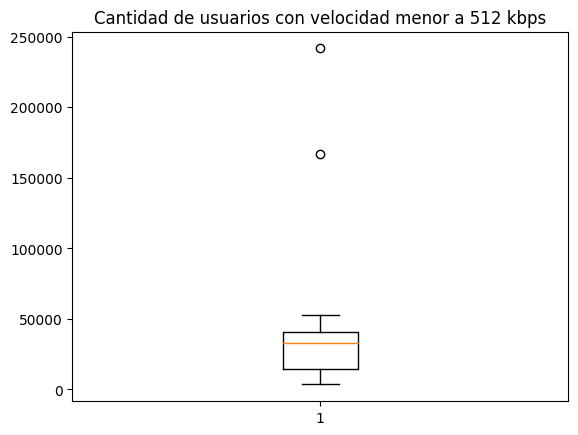

In [54]:
plt.boxplot(df['Hasta 512 kbps'])
plt.title('Cantidad de usuarios con velocidad menor a 512 kbps')
plt.show()

Analizando cómo los ingresos han cambiado en los últimos años (se excluye el año 2022 porque faltan los datos del último trimestre)

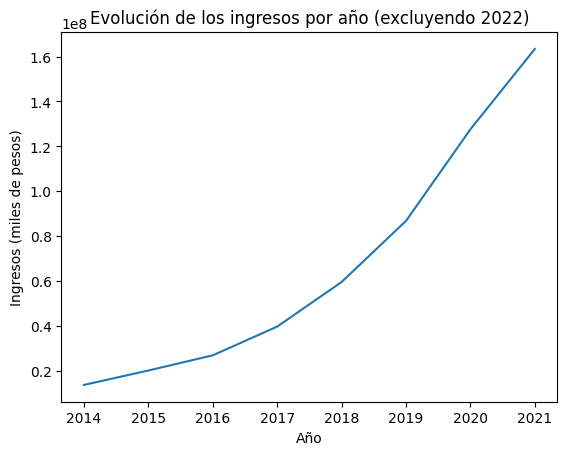

In [55]:
df_filtered = df[df['Año'] < 2022]

data_grouped = df_filtered.groupby('Año')['Ingresos (miles de pesos)'].sum()

data_grouped.plot(kind='line')

plt.title('Evolución de los ingresos por año (excluyendo 2022)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.show()

Analizando la distribución de la velocidad de bajada según cantidad de usuarios. Se observa que la mayoría de los usuarios cuentan con una velocidad de bajada superior a 30 Mbps. Solamente se toman los datos para el último trimestre de 2022 ya que no se quiere comparar la evolución histórica de esta distribución sino el estado más reciente del mismo.

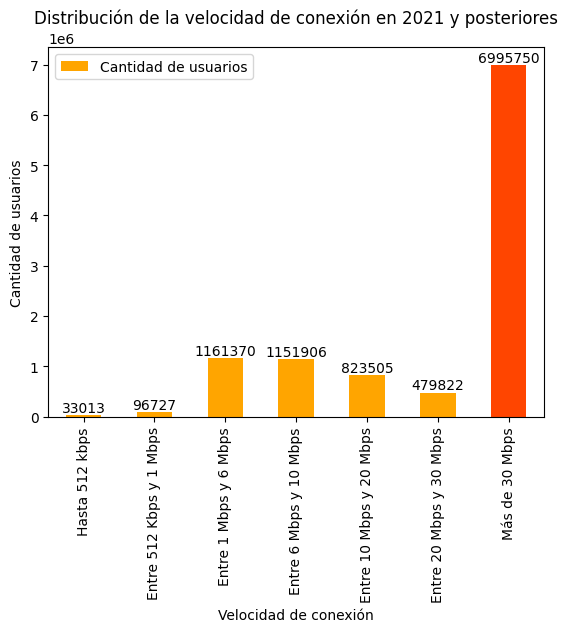

In [56]:
data_velocidad = df.loc[(df['Año'] == 2022) & (df['Trimestre'] == 3),
                        ['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps',                         'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps',                         'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps']]

data_velocidad_sum = pd.DataFrame(data_velocidad.sum(), columns=['Cantidad de usuarios'])

ax = data_velocidad_sum.plot(kind='bar', color='orange')
ax.patches[6].set_facecolor('orangered')

plt.title('Distribución de la velocidad de conexión en 2021 y posteriores')
plt.xlabel('Velocidad de conexión')
plt.ylabel('Cantidad de usuarios')

for i, v in enumerate(data_velocidad_sum['Cantidad de usuarios']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

Comparamos el porcentaje de usuarios que se coenctan mediante tecnologías de banda ancha (tales como fibra óptica, ADSL, CableModem, etc) versus los que se conectan mediante la obsoleta tecnología Dial up, durante el último año (2022).

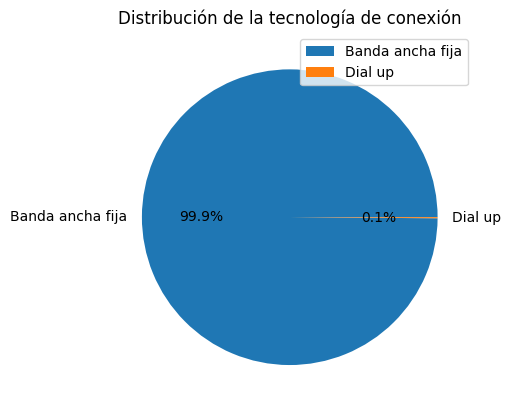

In [57]:
data_tecnologia = df.loc[df['Año'] == 2022,['Banda ancha fija', 'Dial up']]

data_tecnologia_sum = pd.DataFrame(data_tecnologia.sum(), columns=['Cantidad de usuarios'])

data_tecnologia_sum.plot(kind='pie', y='Cantidad de usuarios', autopct='%1.1f%%')

plt.title('Distribución de la tecnología de conexión')
plt.ylabel('')
plt.show()

Analizamos cómo se distribuyen los usuarios de las diferentes tecnologías durante el último año (2022).

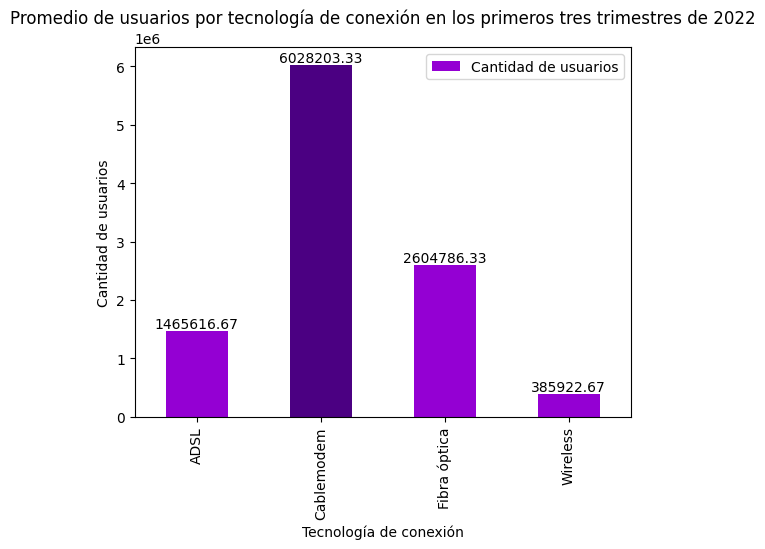

In [58]:
data_tecnologia = df.loc[(df['Año'] == 2022) & (df['Trimestre'].isin([1,2,3])),
                         ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless']]

data_tecnologia_mean = pd.DataFrame(data_tecnologia.mean(), columns=['Cantidad de usuarios'])

ax = data_tecnologia_mean.plot(kind='bar', color='darkviolet')

ax.patches[1].set_facecolor('indigo')

plt.title('Promedio de usuarios por tecnología de conexión en los primeros tres trimestres de 2022')
plt.xlabel('Tecnología de conexión')
plt.ylabel('Cantidad de usuarios')

for i, v in enumerate(data_tecnologia_mean['Cantidad de usuarios']):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')

plt.show()

Se analiza la correlación de la penetración de servicios de internet por cada 100 hogares y por cada 100 habitantes, encontrando una muy alta correlación y una relación matemática cercana a 1:3 es decir, 3 usuarios por hogar.

Text(0, 0.5, 'Accesos por cada 100 habitantes')

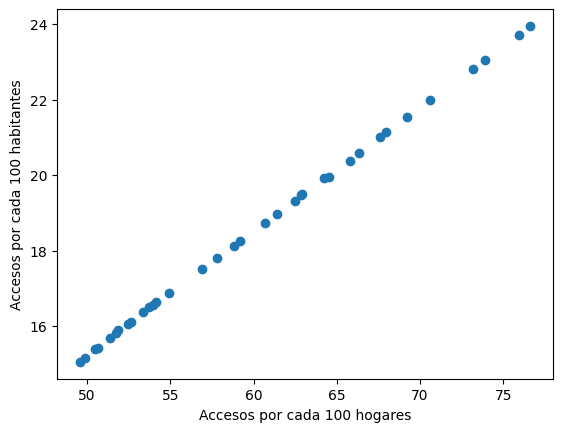

In [59]:
fig, ax = plt.subplots()

ax.scatter(df['Accesos por cada 100 hogares'], df['Accesos por cada 100 hab'])

ax.set_xlabel('Accesos por cada 100 hogares')
ax.set_ylabel('Accesos por cada 100 habitantes')

Se analiza la penetración del servicio de internet trimestre a trimestre observando claramente que durante los dos últimos trimestres de cada año aumenta la penetración.

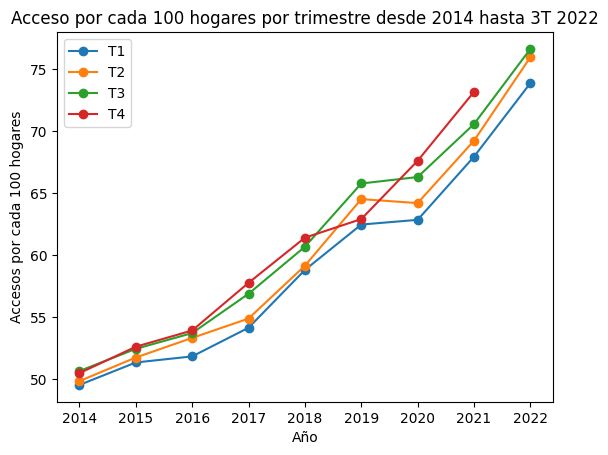

In [60]:
df_trim = df.select_dtypes(include='number')[(df['Año'] >= 2014) & ((df['Año'] < 2022) | ((df['Año'] == 2022) & (df['Trimestre'] <= 3)))]

trimestres = ['T1', 'T2', 'T3', 'T4']

data = df_trim.groupby(['Año', 'Trimestre']).mean()['Accesos por cada 100 hogares']

fig, ax = plt.subplots()

ax.plot(data.unstack(), marker='o')

ax.set_xlabel('Año')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Acceso por cada 100 hogares por trimestre desde 2014 hasta 3T 2022')

ax.legend(trimestres, loc='best')